In [1]:
import joblib

import torch
import torch.nn as nn
import torch.optim as opt
import torch.autograd as auto
from torch.utils.data import TensorDataset,DataLoader
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.externals import joblib
import librosa
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn.functional as F

In [2]:
w2v_file='C:/Users/Subhani/Documents/Jupyter IR/Project/Advanced dataset/1/word_embeddings_dataset_1.sav'
dataset= joblib.load(w2v_file)
len(dataset)

11112

In [3]:
# max_len= -1
# min_len=1000000
# for i in dataset:
#     if(max_len<=len(i[0])):
#         max_len=len(i[0])
#     if(min_len>=len(i[0])):
#         min_len=len(i[0])
# print(max_len,min_len)

In [4]:
max_len=140

In [5]:
counter=[0 for i in range(141)]

for i in dataset:
    counter[len(i[1])]= counter[len(i[1])] + 1

for i in range(141):
    print(i,':',counter[i])

np.mean(counter)

0 : 0
1 : 36
2 : 30
3 : 46
4 : 62
5 : 128
6 : 160
7 : 184
8 : 195
9 : 269
10 : 232
11 : 274
12 : 277
13 : 332
14 : 338
15 : 317
16 : 359
17 : 360
18 : 386
19 : 366
20 : 355
21 : 329
22 : 370
23 : 338
24 : 334
25 : 371
26 : 334
27 : 320
28 : 315
29 : 284
30 : 288
31 : 252
32 : 281
33 : 233
34 : 241
35 : 202
36 : 198
37 : 165
38 : 160
39 : 144
40 : 146
41 : 118
42 : 110
43 : 114
44 : 102
45 : 85
46 : 68
47 : 61
48 : 53
49 : 37
50 : 30
51 : 40
52 : 30
53 : 30
54 : 22
55 : 22
56 : 14
57 : 20
58 : 13
59 : 15
60 : 9
61 : 15
62 : 15
63 : 9
64 : 6
65 : 3
66 : 6
67 : 10
68 : 3
69 : 3
70 : 5
71 : 5
72 : 0
73 : 3
74 : 2
75 : 1
76 : 4
77 : 2
78 : 1
79 : 1
80 : 3
81 : 0
82 : 0
83 : 1
84 : 0
85 : 0
86 : 0
87 : 0
88 : 0
89 : 0
90 : 1
91 : 0
92 : 2
93 : 2
94 : 0
95 : 0
96 : 0
97 : 0
98 : 1
99 : 0
100 : 0
101 : 0
102 : 0
103 : 0
104 : 1
105 : 0
106 : 0
107 : 0
108 : 0
109 : 0
110 : 0
111 : 0
112 : 0
113 : 0
114 : 0
115 : 1
116 : 0
117 : 0
118 : 0
119 : 0
120 : 0
121 : 0
122 : 0
123 : 0
124 : 0
125 : 0


78.80851063829788

In [6]:
X,y=[],[]
for i in dataset:
    temp=i[1]
    
    if(len(i[1])<max_len):
        for j in range(max_len-len(i[1])):
            pad=[0 for k in range(300)]
            temp.append(pad)
        X.append(temp)
    else:
        X.append(i[1])
    y.append(i[2])

In [7]:
X=np.asarray(X)

In [8]:
new_X=[]

for i in range(len(X)):
    temp=np.mean(X[i],axis=0,keepdims=True)
#     X[i]=temp
    new_X.append(temp)

In [9]:
# l=140
# count=0
# for i in X:
#     if(l==len(i)):
# #         print('---')
#         count+=1
# print(count)

In [10]:
train_X=[]

for i in new_X:
    train_X.append(i[0])

In [11]:
len(train_X)

11112

In [12]:
temp_x=[]

for i in train_X:
    l_temp=[]
    for j in i:
        l_temp.append([j])
    temp_x.append(l_temp)

In [13]:
temp_x[0]

[[-0.012199440452137163],
 [0.05298086573768939],
 [0.0029068594133215293],
 [0.0019670916704594026],
 [0.008933290546493871],
 [-0.024188383523973504],
 [-0.02404488330440862],
 [0.004582059140583235],
 [0.013381487784707652],
 [-0.02257917704326766],
 [-0.02187876240017691],
 [0.0034682752396162997],
 [-0.009163295821885445],
 [0.04298273813744475],
 [-0.052745633625558445],
 [-0.009287157871170036],
 [0.042441080790013075],
 [-0.01617152692217912],
 [0.0077864873149207725],
 [0.006544634300683226],
 [-0.022978974472581674],
 [-0.015411352406122856],
 [-0.016787969997884438],
 [0.017838463726054344],
 [-0.02298450005806184],
 [0.010933673498220742],
 [-0.017639266726161753],
 [-0.003361061800803457],
 [0.004698575604041772],
 [-0.012023692458335842],
 [0.03500282647354262],
 [-0.04136978497595659],
 [0.011025372258570445],
 [0.003217078057215466],
 [-0.02225298114353791],
 [-0.005921875226444432],
 [-0.03265477694304926],
 [-0.027070353818791252],
 [-0.008568167119769246],
 [-0.00280

In [14]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(temp_x, y, test_size=0.2, random_state=42)

In [15]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.Tensor(y_train)
y_test=torch.Tensor(y_test)

In [16]:
BATCH_SIZE = 16

In [17]:
train_ds = TensorDataset(X_train, y_train)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)

test_ds = TensorDataset(X_test, y_test)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE * 2)

In [18]:
# parameters 

# N_STEPS = 140
# N_INPUTS = 300
# N_NEURONS = 300
# N_OUTPUTS = 2
# N_EPHOCS = 10

N_STEPS = 300
N_INPUTS = 1
N_NEURONS = 300
N_OUTPUTS = 2
N_EPHOCS = 10

In [19]:
class Factual_LSTM(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(Factual_LSTM, self).__init__()
        
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        print(batch_size, n_steps, n_inputs, n_neurons, n_outputs)
        self.lstm = nn.LSTM(self.n_inputs, self.n_neurons,3,dropout=0.2)
#         self.lstm = nn.LSTM(self.n_inputs, self.n_neurons,3)
        
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)
        
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons),torch.zeros(1, self.batch_size, self.n_neurons))
        
    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2) 
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        
        lstm_out, self.hidden = self.lstm(X)  
        out = self.FC(lstm_out[-1])
        
        return out.view(-1, self.n_outputs)


In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = Factual_LSTM(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
criterion = F.cross_entropy
optimizer = optim.Adam(model.parameters(), lr=5e-3)
# optimizer = optim.SGD(model.parameters(), lr =5e-3, momentum=0.9)

def get_accuracy(logit, target, batch_size):
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

16 300 1 300 2


In [21]:
def eval_model(model, val_iter):
    total_epoch_loss = 0
    valid_acc = 0
    total_epoch_acc=0
    model.cuda()
    model.eval()
    num_corrects=0
    total=0
    with torch.no_grad():
        for idx, batch in enumerate(val_iter):
            inputs = batch[0]
            
            target = batch[1]
            target = torch.autograd.Variable(target).long()
            
            inputs=inputs.cuda()
            target=target.cuda()
            prediction = model(inputs)
            loss = criterion(prediction, target)
        
            _, predicted = torch.max(prediction.data, 1)
            num_corrects += (predicted == target).sum().item()
            
            total+=target.size(0)
            total_epoch_loss += loss.item()
        acc = 100.0 * num_corrects/total
        
    return total_epoch_loss/len(val_iter), acc

In [22]:
for_plot_loss=[]
for_plot_acc=[]

val_loss=[]
val_acc=[]
for epoch in range(N_EPHOCS):
    train_running_loss = 0.0
    train_acc = 0.0
    model.cuda()
    model.train()
    num_corrects=0
    total=0
    
    for i, data in enumerate(train_dl):
        optimizer.zero_grad()
        
        model.hidden = model.init_hidden() 
        
        inputs, labels = data
        inputs = inputs.view(-1, 300,1)
        
        inputs=inputs.cuda()
        labels=labels.cuda()
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        
        _, predicted = torch.max(outputs.data, 1)
        num_corrects += (predicted == labels.long()).sum().item()
        total+=labels.size(0)
    
    acc = 100.0 * num_corrects/total
    for_plot_loss.append(train_running_loss/i)
    for_plot_acc.append(acc)
    
    model.eval()
    
    valid_loss,valid_accuracy=eval_model(model,test_dl)
    
    val_loss.append(valid_loss)
    val_acc.append(valid_accuracy)
    
#     print('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f' 
#           %(epoch, train_running_loss / i, acc),'==>',valid_loss,valid_accuracy)
    print('Epoch:  %d | Train_Loss: %.4f | Train_Accuracy: %.2f | Validation_Loss: %.4f | Validation_Accuracy: %.2f' 
          %(epoch, train_running_loss / i, acc,valid_loss,valid_accuracy))

Epoch:  0 | Train_Loss: 0.6976 | Train_Accuracy: 53.39 | Validation_Loss: 0.6864 | Validation_Accuracy: 55.96
Epoch:  1 | Train_Loss: 0.6905 | Train_Accuracy: 54.90 | Validation_Loss: 0.6864 | Validation_Accuracy: 55.96
Epoch:  2 | Train_Loss: 0.6904 | Train_Accuracy: 54.88 | Validation_Loss: 0.6863 | Validation_Accuracy: 55.96
Epoch:  3 | Train_Loss: 0.6906 | Train_Accuracy: 54.85 | Validation_Loss: 0.6862 | Validation_Accuracy: 55.96
Epoch:  4 | Train_Loss: 0.6901 | Train_Accuracy: 54.89 | Validation_Loss: 0.6864 | Validation_Accuracy: 55.96
Epoch:  5 | Train_Loss: 0.6902 | Train_Accuracy: 54.88 | Validation_Loss: 0.6863 | Validation_Accuracy: 55.96
Epoch:  6 | Train_Loss: 0.6906 | Train_Accuracy: 54.70 | Validation_Loss: 0.6862 | Validation_Accuracy: 55.96
Epoch:  7 | Train_Loss: 0.6908 | Train_Accuracy: 54.89 | Validation_Loss: 0.6871 | Validation_Accuracy: 55.96
Epoch:  8 | Train_Loss: 0.6903 | Train_Accuracy: 54.89 | Validation_Loss: 0.6862 | Validation_Accuracy: 55.96
Epoch:  9 

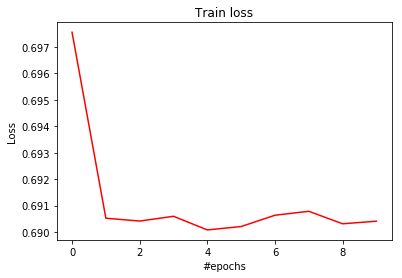

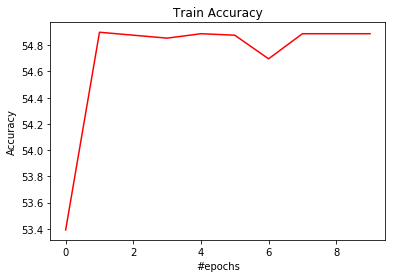

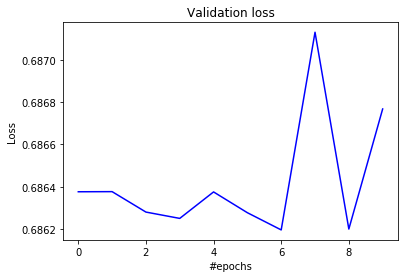

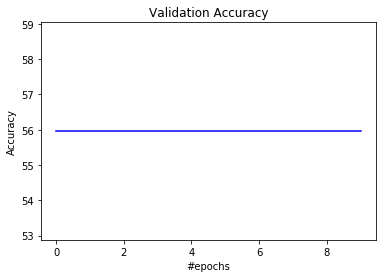

In [23]:
import matplotlib.pyplot as plt

plt.title('Train loss')
plt.plot(range(len(for_plot_loss)),for_plot_loss, color='r')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.show()

plt.title('Train Accuracy')
plt.plot(range(len(for_plot_acc)),for_plot_acc,color='r')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.show()

plt.title('Validation loss')
plt.plot(range(len(val_loss)),val_loss,color='b')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.show()

plt.title('Validation Accuracy')
plt.plot(range(len(val_acc)),val_acc,color='b')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.show()

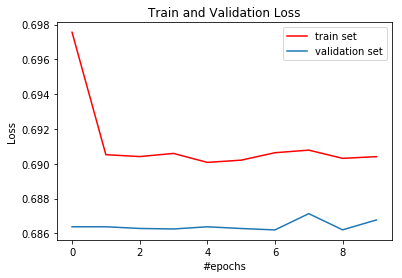

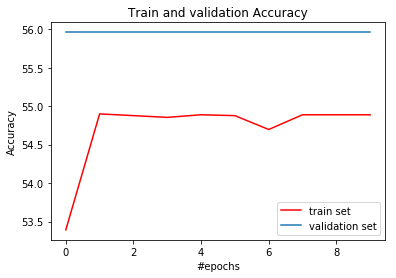

In [24]:
plt.title('Train and Validation Loss')
plt.plot(range(len(for_plot_loss)),for_plot_loss, color='r',label='train set')
plt.plot(range(len(val_loss)),val_loss,label='validation set')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Train and validation Accuracy')
plt.plot(range(len(for_plot_acc)),for_plot_acc,color='r',label='train set')
plt.plot(range(len(val_acc)),val_acc,label='validation set')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()